In [2]:
import pandas as pd
import seaborn as sns 
import numpy as np

In [110]:
countries = pd.read_csv("Data/countries of the world.csv",decimal=',')

In [111]:
death_rates_smoking_age = pd.read_csv("Data/death_rates_smoking_age.csv")

In [112]:
countries

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,NaN,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,NaN,NaN,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


In [113]:
GDP = countries[["Country","GDP ($ per capita)"]].copy()

In [114]:
import pickle

In [115]:
convCountry2Code = pickle.load(open("Data/countryToCode.pkl","rb"))

In [116]:
GDP["Country"] = GDP["Country"].str.strip()

In [117]:
convCountry2Code.update({"Anguilla":"AIA"})

In [118]:
GDP["Code"] = GDP["Country"].apply(lambda x: convCountry2Code[x] if x in convCountry2Code else "")

In [119]:
GDP = GDP[["Code","GDP ($ per capita)"]]

In [120]:
death_rates_smoking_age = death_rates_smoking_age[["Code","Year","All_ages"]]

In [121]:
death_rates_smoking_age = death_rates_smoking_age.pivot_table("All_ages",["Code"],"Year")

In [122]:
death_rates_smoking_age["avg"]  = death_rates_smoking_age.mean(axis=1)

In [123]:
death_rates_smoking_age.columns = ["deathRate_"+str(x) for x in death_rates_smoking_age.columns]

In [124]:
A = GDP[["Code","GDP ($ per capita)"]].copy()

In [125]:
B = death_rates_smoking_age.reset_index()[["Code","deathRate_avg"]].copy()

In [126]:
cbd = pd.merge(B,A,how="inner")

In [127]:
cbd

,Code,deathRate_avg,GDP ($ per capita)
0,AFG,38.164768,700.0
1,AGO,43.738552,1900.0
2,ALB,102.009951,4500.0
3,AND,95.704627,19000.0
4,ARE,16.368323,23200.0
...,...,...,...
168,WSM,81.374341,5600.0
169,YEM,44.052553,800.0
170,ZAF,81.575526,10700.0
171,ZMB,35.539675,800.0


<AxesSubplot:xlabel='GDP ($ per capita)', ylabel='deathRate_avg'>

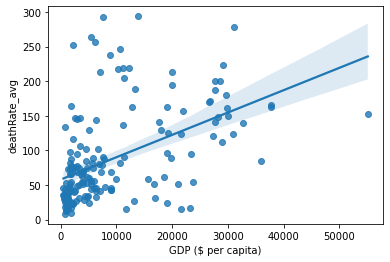

In [128]:
sns.regplot(data=cbd,x ="GDP ($ per capita)", y= "deathRate_avg")

In [129]:
countries["Country"] =countries["Country"].str.strip()

In [130]:
countries["Code"] = countries["Country"].apply(lambda x: convCountry2Code[x] if x in convCountry2Code else "")

In [131]:
from matplotlib import pyplot as plt

In [132]:
countries

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Code
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,...,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,AFG
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,...,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,ALB
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,...,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298,DZA
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,...,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN,ASM
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,...,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN,AND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,NaN,...,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630,
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,NaN,NaN,...,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400,
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,...,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393,YEM
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,...,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489,ZMB


In [134]:
countries.columns[2:-1]

Index(['Population', 'Area (sq. mi.)', 'Pop. Density (per sq. mi.)',
       'Coastline (coast/area ratio)', 'Net migration',
       'Infant mortality (per 1000 births)', 'GDP ($ per capita)',
       'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)',
       'Other (%)', 'Climate', 'Birthrate', 'Deathrate', 'Agriculture',
       'Industry', 'Service'],
      dtype='object')

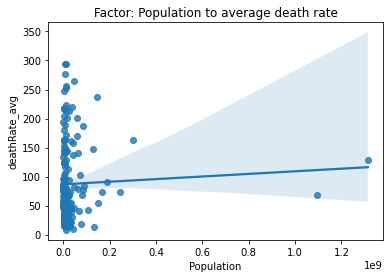

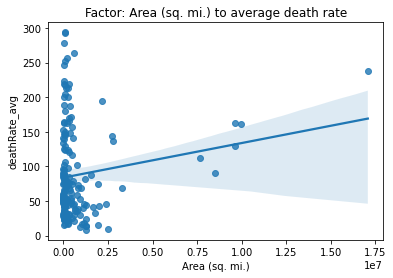

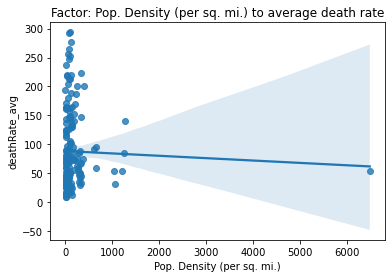

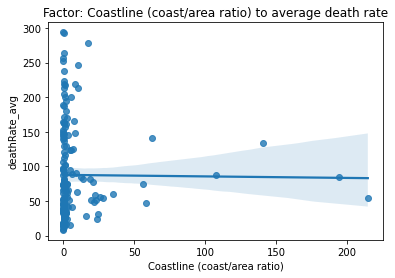

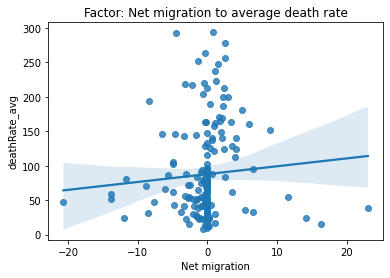

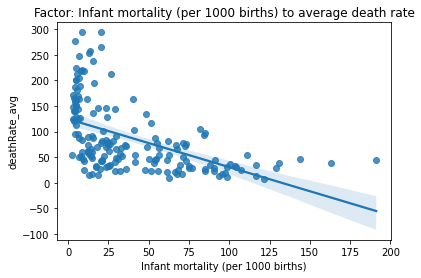

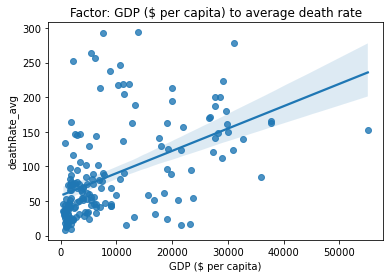

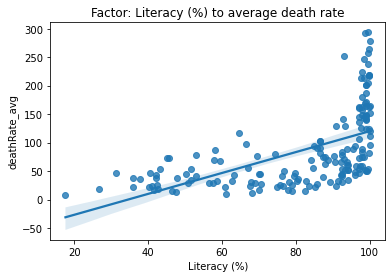

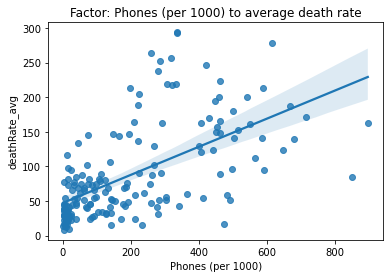

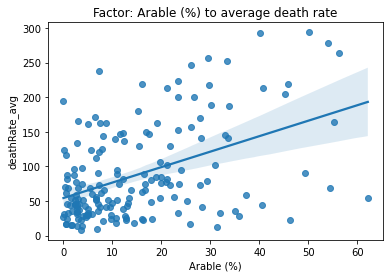

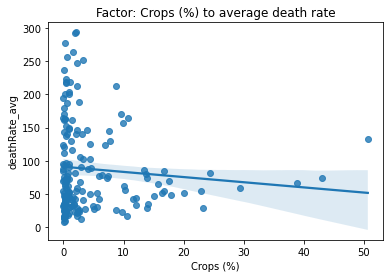

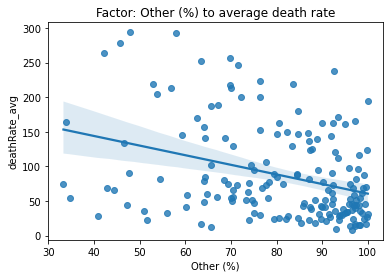

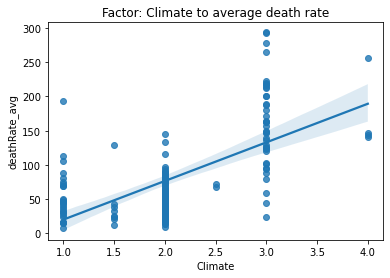

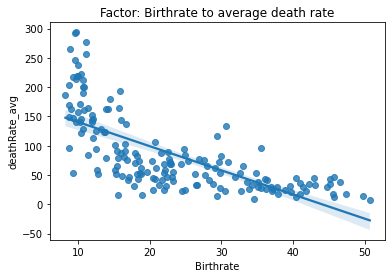

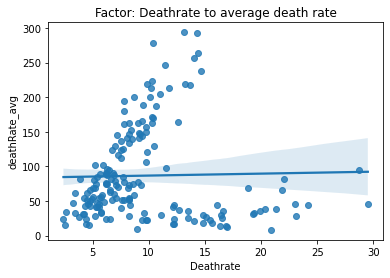

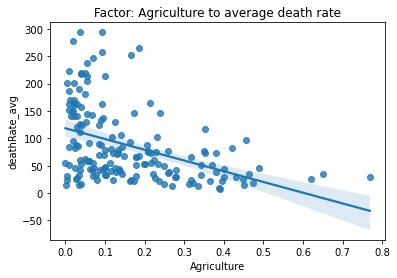

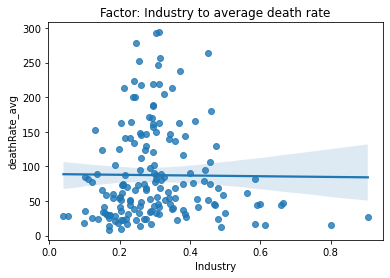

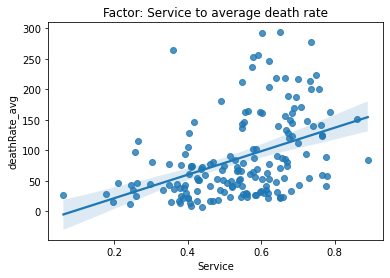

In [137]:

for column in countries.columns[2:-1]:
    A = countries[["Code",column]].copy()
    B = death_rates_smoking_age.reset_index()[["Code","deathRate_avg"]].copy()
    #print(A)
    #print(B)
    cbd = pd.merge(B,A,how="inner")
    fig,ax = plt.subplots()
    
    sns.regplot(data=cbd,x =column, y= "deathRate_avg")
    plt.title("Factor: {x} to average death rate".format(x=column))
